In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Datasets/Innomatics'
df = pd.read_csv(root_path + '//data.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [12]:
df.mean()

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

In [13]:
df.median()

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64

In [14]:
df.mode()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,45000,25000,4,0,590400,Graduate,1


In [15]:
df.var()

Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

In [16]:
df.std()

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

In [18]:
df.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


In [37]:
df.skew()

Mthly_HH_Income          0.924615
Mthly_HH_Expense         1.199461
No_of_Fly_Members        0.113674
Emi_or_Rent_Amt          3.403680
Annual_HH_Income         1.192949
No_of_Earning_Members    1.593301
dtype: float64

In [39]:
df.kurt()

Mthly_HH_Income           0.115550
Mthly_HH_Expense          0.942490
No_of_Fly_Members        -0.851445
Emi_or_Rent_Amt          14.202523
Annual_HH_Income          1.101291
No_of_Earning_Members     2.093212
dtype: float64

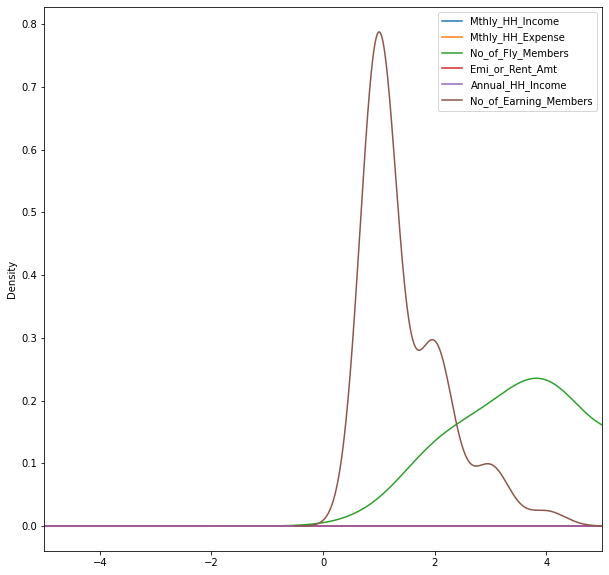

In [40]:
df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5))

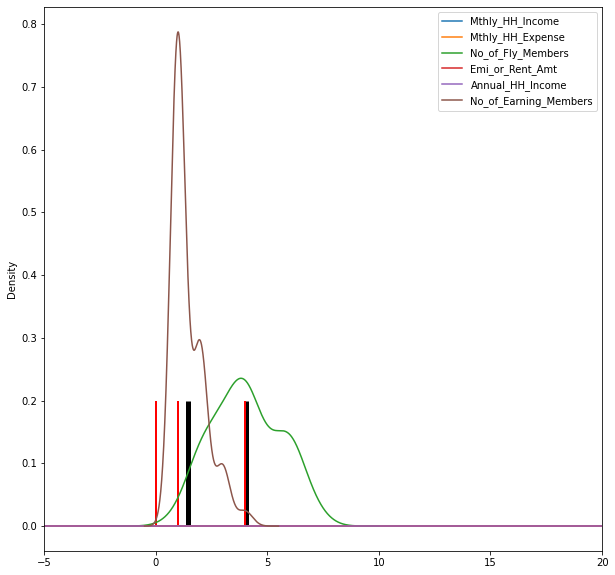

In [43]:
df.plot(kind="density",
              figsize=(10,10),
              xlim=(-5,20));


plt.vlines(df.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0);

plt.vlines(df.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="red");

In [52]:
from scipy.stats import skew
import numpy as np
x= np.random.normal(0,5,10)
print("X:",x)
print("Skewness for data :",skew(x))

X: [ -1.52265272   1.42363635  -3.20618617   6.16049052  -3.47358707
 -12.55069471  -2.72031518   3.40819084  -0.371454    -0.39846907]
Skewness for data : -0.83614780521824


In [ ]:
#https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/


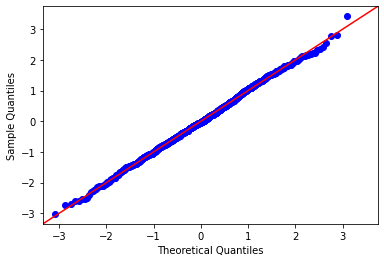

In [53]:
import numpy as np
dataset1=np.random.normal(0,1,1000) #Generates a dataset1 with 1000 points drawn  from a Normal(0,1) distribution
dataset2 = np.random.standard_cauchy(500) #Generates dataset2 with 1000 points drawn  from a Cauchy distribution with mode=0
import statsmodels.api as sm
import pylab as py
sm.qqplot(dataset1,line='45')
py.show()

In [58]:
def nrmldistb(data):
    var_group = data.columns
    size = len(var_group)
    plt.figure(figsize = (7*size,3), dpi = 400)

    #looping for each variable
    for j,i in enumerate(var_group):
        

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.distplot(data[i],hist=True, kde=True)
        
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                       round(kurt,2),
                                                                                                       round(skew,2),
                                                                                                       (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                       round(mean,2),
                                                                                                       round(median,2)))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/lo

TypeError: ignored

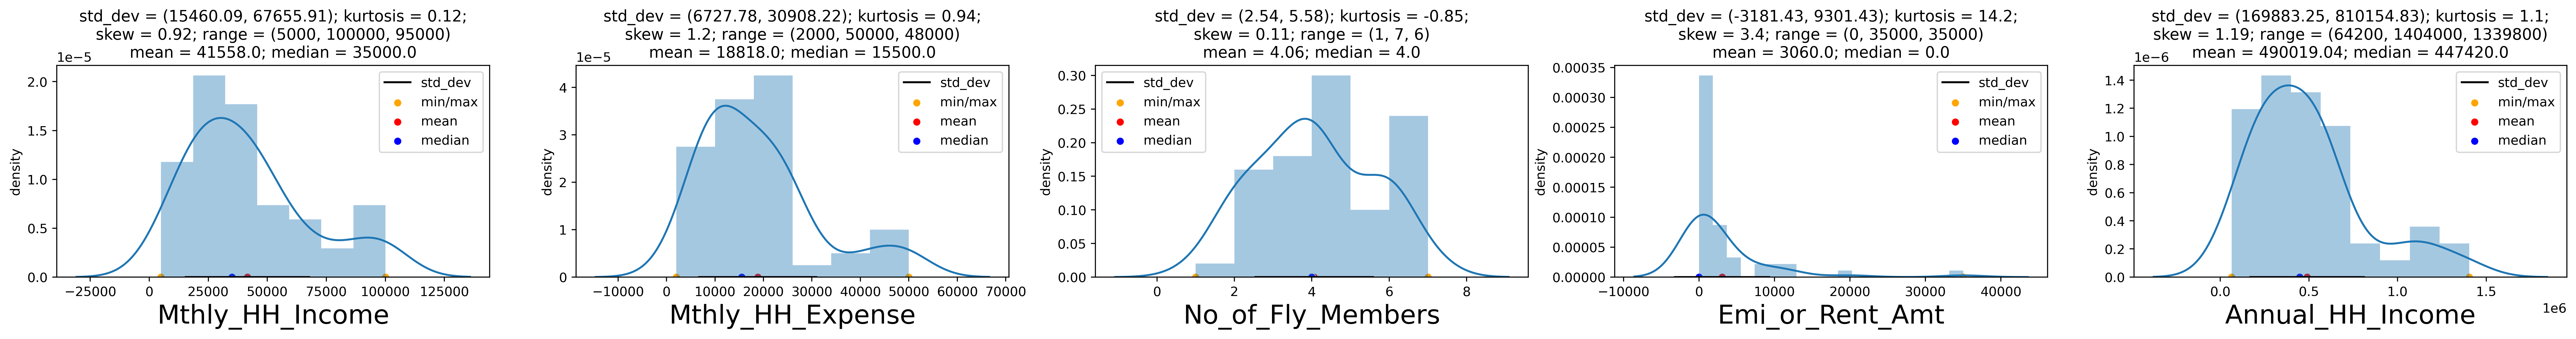

In [59]:
def nrmldistb(df)

(array([6., 7., 9., 7., 9., 3., 2., 1., 2., 4.]),
 array([  5000.,  14500.,  24000.,  33500.,  43000.,  52500.,  62000.,
         71500.,  81000.,  90500., 100000.]),
 <a list of 10 Patch objects>)

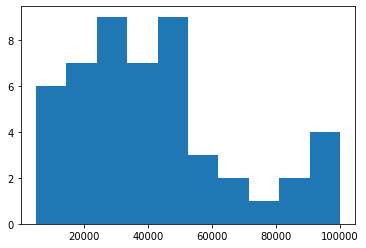

In [68]:
plt.hist(df['Mthly_HH_Income'])

In [63]:
plt.hist(df['Mthly_HH_Expense'])

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'Highest_Qualified_Member',
       'No_of_Earning_Members'],
      dtype='object')

(array([ 1.,  8.,  0.,  9.,  0., 15.,  5.,  0., 10.,  2.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

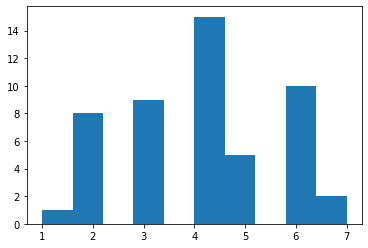

In [67]:
plt.hist(df['No_of_Fly_Members'])

array([ -1.52265272,   1.42363635,  -3.20618617,   6.16049052,
        -3.47358707, -12.55069471,  -2.72031518,   3.40819084,
        -0.371454  ,  -0.39846907])

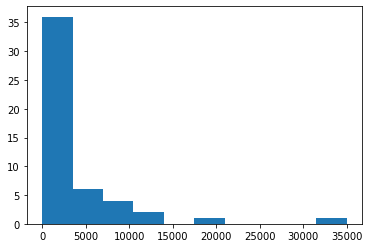

In [69]:
plt.hist(df['Emi_or_Rent_Amt'])


(array([ 7., 12.,  8., 11.,  4.,  1.,  1.,  2.,  2.,  2.]),
 array([  64200.,  198180.,  332160.,  466140.,  600120.,  734100.,
         868080., 1002060., 1136040., 1270020., 1404000.]),
 <a list of 10 Patch objects>)

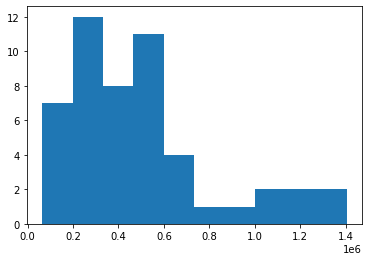

In [70]:
plt.hist(df['Annual_HH_Income'])



(array([33.,  0.,  0., 12.,  0.,  0.,  4.,  0.,  0.,  1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

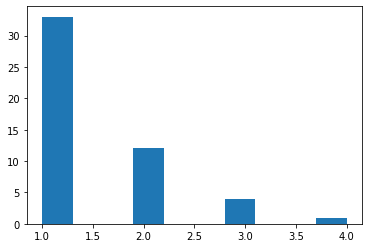

In [71]:
plt.hist(df['No_of_Earning_Members'])